<a href="https://colab.research.google.com/github/JesseLynch37/Math152/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import needed packages

In [39]:
import numpy as np
from matplotlib import pyplot as plt

A function that graphs a polynomial

In [27]:
def graph_poly(coeffs, min_x=-1, max_x=1, points=10000, color='red', size='1', show=True, scatter=False, width=1.5):
  x = np.linspace(min_x, max_x, points)
  y = np.zeros(points)
  power = len(coeffs) - 1
  for i in range(len(coeffs)):
    y += coeffs[i] * x ** (power - i)
  if scatter:
    plt.scatter(x, y, s=size, c=color)
  else:
    plt.plot(x, y, linewidth=width, c=color)
  if show:
    plt.show()

A function that takes in a set of points and returns [m, b] for the linear regression of the points y = mx + b.

In [28]:
def linear_reg(data_points, precision=4):
    num_points = len(data_points)
    A = np.zeros((num_points, 2))
    A[:, :] = data_points
    B = np.array(A[:, 1])
    A[:, 1] = [1]*num_points
    C = np.matmul(np.transpose(A), A)
    D = np.matmul(np.transpose(A), B)
    X = np.matmul(np.linalg.inv(C), D)
    X = [round(X[0], precision), round(X[1], precision)]
    print("y = {}x + {}".format(X[0], X[1]))
    return X

Example data set for linear_reg:

y = 3.1397x + -2.1788


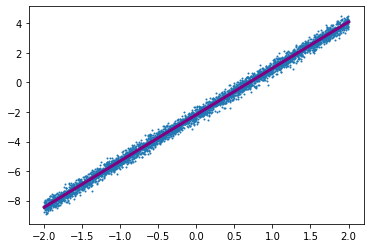

In [38]:
def line(x):
    return 3.141*x - 2.178

x = np.linspace(-2, 2, 4000)
y = line(x) + np.random.randn(4000) / 4

data_points = [(x[i], y[i]) for i in range(len(x))]

coeffs = linear_reg(data_points)
graph_poly(coeffs, -2, 2, color='purple', width=3, show=False)
plt.scatter(x, y, s=1)

A function that takes in a set of points and returns [a, b, c] for the quadratic regression of the points y = ax^2 + bx + c.

In [22]:
def quad_reg(data_points, precision=4):
    num_points = len(data_points)
    A = np.zeros((num_points, 3))
    y_values = np.array(data_points)[:, 0]
    for j in range(3):
        A[:, j] = y_values ** (2 - j)
    B = np.array(data_points)[:, 1]
    ATA = np.matmul(np.transpose(A), A)
    ATB = np.matmul(np.transpose(A), B)
    X = np.matmul(np.linalg.inv(ATA), ATB)
    X_list = [0]*len(X)
    for i in range(len(X)):
        X_list[i] = round(X[i], precision)
    print("y = {}x^2 + {}x + {}".format(X_list[0], X_list[1], X_list[2]))
    return X_list


Example data set for quad_reg:

y = 0.7786x^2 + -1.8807x + -1.1376


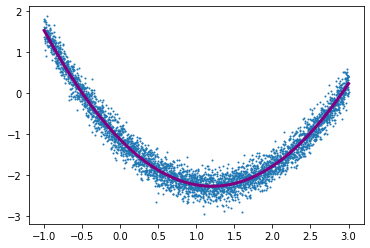

In [23]:
def quad(x):
    return 0.78 * x ** 2 - 1.88 * x - 1.15

x = np.linspace(-1, 3, 4000)
y = quad(x) + np.random.randn(4000) / 5

data_points = [(x[i], y[i]) for i in range(len(x))]

coeffs = quad_reg(data_points)
graph_poly(coeffs, -1, 3, color='purple', width=3, show=False)
plt.scatter(x, y, s=1)

A function that takes in a set of points and returns a list of coefficients for the polynomial regression with the power corresponding to the *power* argument.

In [24]:
def poly_reg(data_points, power=1, precision=4):
    num_points = len(data_points)
    A = np.zeros((num_points, power + 1))
    y_values = np.array(data_points)[:, 0]
    for j in range(power + 1):
        A[:, j] = y_values ** (power - j)
    B = np.array(data_points)[:, 1]
    ATA = np.matmul(np.transpose(A), A)
    ATB = np.matmul(np.transpose(A), B)
    X = np.matmul(np.linalg.inv(ATA), ATB)
    X_list = [0]*len(X)
    for i in range(len(X)):
        X_list[i] = round(X[i], precision)

    equation = "y = "
    for p in range(power + 1)[::-1]:
        if p > 1:
            equation = equation + "{}x^{} + ".format(X_list[-1-p], p)
        elif p == 1:
            equation = equation + "{}x + ".format(X_list[-1-p])
        elif p == 0:
            equation = equation + "{}".format(X_list[-1])
    print(equation)
    return X_list

Example data set for poly_reg:

y = -0.76x^5 + -0.9985x^4 + 3.6415x^3 + 3.4413x^2 + -2.1546x + -1.3512


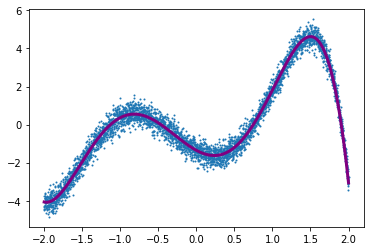

In [25]:
def polynomial(x):
    return -0.76*x**5 - x**4 + 3.64*x**3 + 3.45*x**2 - 2.15*x - 1.36

x = np.linspace(-2, 2, 4000)
y = polynomial(x) + np.random.randn(4000) / 3

data_points = [(x[i], y[i]) for i in range(len(x))]

coeffs = poly_reg(data_points, 5)
graph_poly(coeffs, -2, 2, color='purple', width=3, show=False)
plt.scatter(x, y, s=1)